# Hand written Recognition MNIST dataset with Decision tree

Para iniciar, se debe decargar los datasets de MNIST, en la misma raiz de este jupyter notebook, en una carpeta 'MNIST_data':
    - t10k-images-idx3-ubyte.gz
    - t10k-labels-idx1-ubyte.gz
    - train-images-idx3-ubyte.gz
    - train-labels-idx1-ubyte.gz

Abrir una instancia de CMD, para descomprimir la data, ejecutar:

    gzip *ubyte.gz -d

Instalar MNIST (CMD):

    pip install python-mnist

In [1]:
# importar las librerias

%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from mnist import MNIST

In [2]:
#importar el dataset

mndata = MNIST('MNIST_data')

# cargar la data de training (features -> images y labels -> labels)

images, labels = mndata.load_training()

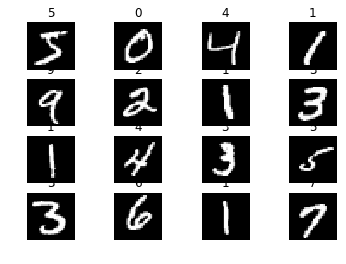

In [4]:
# graficamos 16 imagenes del dataset de training

plt.gray()
for i in range(16):
    plt.subplot(4,4,i+1)
    
    d_image = images[i]
    d_image = np.array(d_image, dtype='float')
    pixels = d_image.reshape((28, 28))
    plt.imshow(pixels, cmap='gray')
    plt.title(labels[i])
    plt.axis('off')
plt.show()

In [5]:
# definimos una funcion para evaluar el clasificador

def evaluate_classifier(clf, test_data, test_labels):
    pred = clf.predict(test_data)
    C = confusion_matrix(test_labels, pred)
    return C.diagonal().sum()*100./C.sum(),C

In [6]:
# Dividimos el dataset en:
#  -Datos de Entremamiento 80%  (features, labels)
#  -Datos de Testing  20%   (features y labels)

train_data, test_data, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=42)

In [8]:
# Entrenamiento del Arbol de decisiones

from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(train_data, train_labels)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

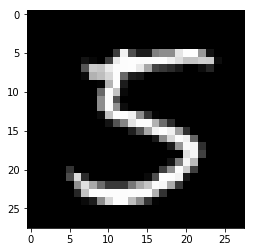

In [10]:
# Elegimos al azar una imagen del dataset de prueba. Index 8y lo graficamos para identificar q digito es

d = test_data[8]
d = np.array(d, dtype='float')
pixels = d.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()

In [11]:
# Aplicamos el clasificador a este index para ver el resultado
print(clf.predict( [test_data[8]]))

[5]


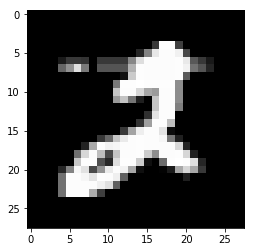

In [12]:
# Identificamos la imagen del index 100

d = test_data[100]
d = np.array(d, dtype='float')
pixels = d.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()

In [13]:
# Aplicamos para el index 100. Lo hace correctamente

print(clf.predict( [test_data[100]]))

[2]


In [30]:
# vamos a evaluar nuestro clasificador con todo el "training" y "testing" set

s,C = evaluate_classifier(clf, test_data, test_labels)

In [31]:
print(s)
print(C)

86.975
[[1069    2   20    6    8   24   16   11   12    7]
 [   1 1273    5   11    3    5    8    3   10    3]
 [  21   15 1002   21   20    9   13   23   34   16]
 [  18   12   32 1015   11   51    7   12   31   30]
 [   2    5    6    7 1028    8   15   12   21   72]
 [  10   11   12   54   15  905   27    9   35   26]
 [  24    8   14    2   31   21 1044    6   23    4]
 [   5   15   21   16   15    7    2 1184   13   21]
 [  11   16   34   49   29   27   23   18  924   29]
 [   7   11   10   16   61   19    6   34   37  993]]


In [43]:
# Cargamos los datos de evaluacion

eval_data, eval_labels = mndata.load_testing()

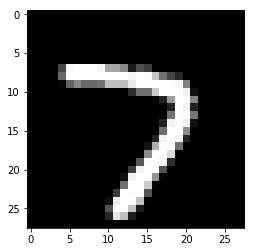

In [46]:
# Identificamos y predecimos para el index 17 del dataset de evaluacion

d = eval_data[17]
d = np.array(d, dtype='float')
pixels = d.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()

In [47]:
print(clf.predict( [eval_data[17]]))

[7]


In [48]:
# Aplicamos el clasificador a todo el dataset de Evaluacion y obtenemos el Accuracy

p = clf.predict(eval_data)

count=0
for i in range(0,len(eval_labels)):
	count +=1 if p[i]==eval_labels[i] else 0
print("Accuracy = ", (count/len(eval_labels))*100)

Accuracy =  87.92999999999999


In [57]:
# Evaluamos los resultados con la matriz de confusion para el dataset de Evaluacion

sEval,CEval = evaluate_classifier(clf, eval_data, np.array(eval_labels))

In [58]:
print(sEval)
print(CEval)

87.93
[[ 916    2   14    4    5   13    9    5    2   10]
 [   0 1101    6    5    2    2    7    1    9    2]
 [   8   11  892   24   11    7   12   13   44   10]
 [   7    1   32  852    3   50    8   14   23   20]
 [   3    5    7    7  860   10   12   10   23   45]
 [  12    9    8   40   13  735   24    2   30   19]
 [  17    4   11    5   18   14  865    5   13    6]
 [   7   10   30   10    7    7    2  921   18   16]
 [   6    7   32   27   27   31   22   13  781   28]
 [   5    4   11   19   43   16    3   21   17  870]]
